In [1]:
import ensembles
import importlib
importlib.reload(ensembles) #this is for notebooks - otherwise I have to restart the kernel every time I change anything


import networks
importlib.reload(networks) #this is for notebooks - otherwise I have to restart the kernel every time I change anything





import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

In [2]:
num_epochs = 100
num_eps = 75#25#75
#seed = 43#43 is cool 101 1011
from global_vars import SEED as seed

params = {'num_neurons':[3],
          #'num_neurons':[10,10,10]
          'num_epochs':num_epochs,
          'learning_rate':0.01,
          'seed':seed}




ensemble = [{'num_neurons':[10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,5,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,5,20],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,10,10],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10,5],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10,10],'num_epochs':num_epochs}]#,'optimizer':tf.train.AdamOptimizer}]
        
ensemble = [{'num_neurons':[2],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[3],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[4],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[5],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[6],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[7],'num_epochs':num_epochs},#,'optimizer':tf.train.AdamOptimizer},
            {'num_neurons':[10],'num_epochs':num_epochs}]#,'optimizer':tf.train.AdamOptimizer}]
          
    
bootstrap_ensemble = {'num_neurons':[10,10,10],'num_epochs':num_epochs}#,'optimizer':tf.train.AdamOptimizer}


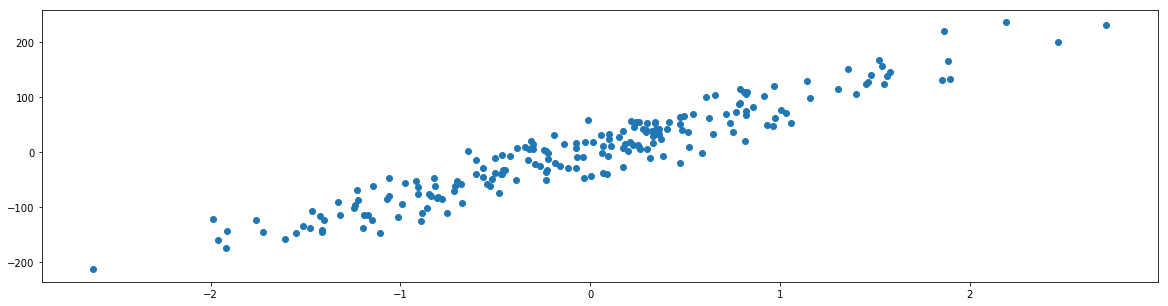

In [3]:
X, y = make_regression(n_samples=200, n_features=1, noise=25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(X,y)

In [4]:
y_test.shape, X_test.shape

((66,), (66, 1))

# Vanilla Ensemble

(66,)
(66, 1)


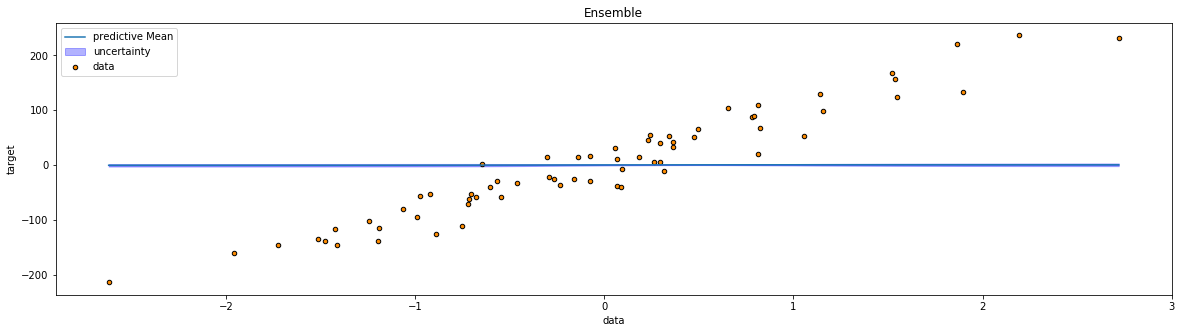

In [5]:
vanialla_ensemble = ensembles.VanillaEnsemble(estimator_stats = ensemble)
vanialla_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

(66,)
(66, 1)


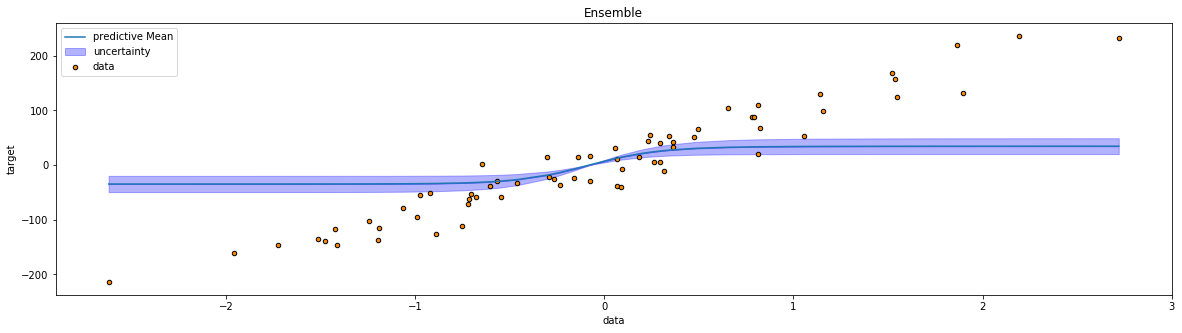

In [6]:
vanialla_ensemble.fit(X_train,y_train)
vanialla_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

In [7]:
vanialla_ensemble.self_evaluate(X_test,y_test)


{'NLPD': -989.6734168996082,
 'correlation between error and variance': 0.43173916794571515,
 'coverage probability': 0.12121212121212122,
 'rsme': 101.49635793227792}

# Bootstrap Ensemble

(66,)
(66, 1)


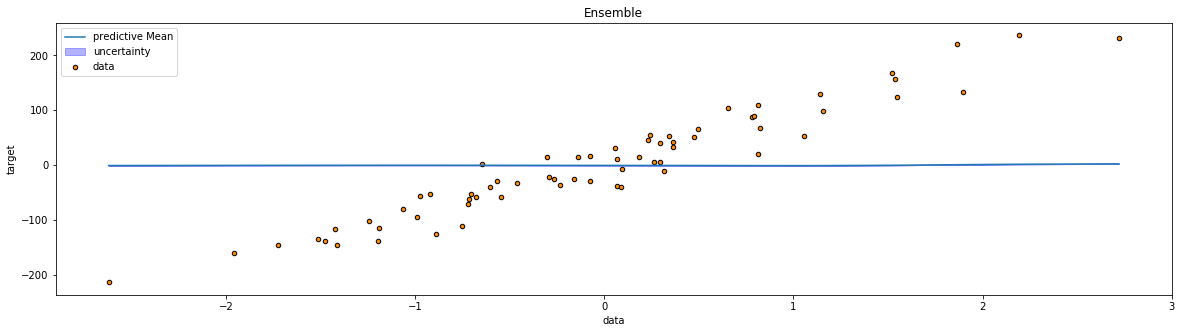

In [8]:
bootstrap_ensemble = ensembles.BootstrapEnsemble(estimator_stats = bootstrap_ensemble)
bootstrap_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(66,)
(66, 1)


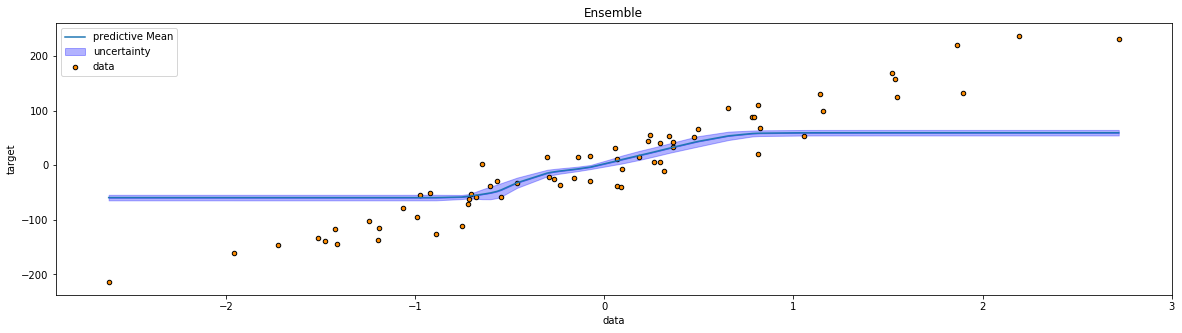

In [9]:
bootstrap_ensemble.fit(X_train,y_train)
bootstrap_ensemble.ensemble_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))

In [10]:
bootstrap_ensemble.self_evaluate(X_test,y_test)


{'NLPD': -1025.8233452242664,
 'correlation between error and variance': -0.25972290194125874,
 'coverage probability': 0.10606060606060606,
 'rsme': 108.0608119951813}

# DropoutNetwork

(66,)
(66, 1)


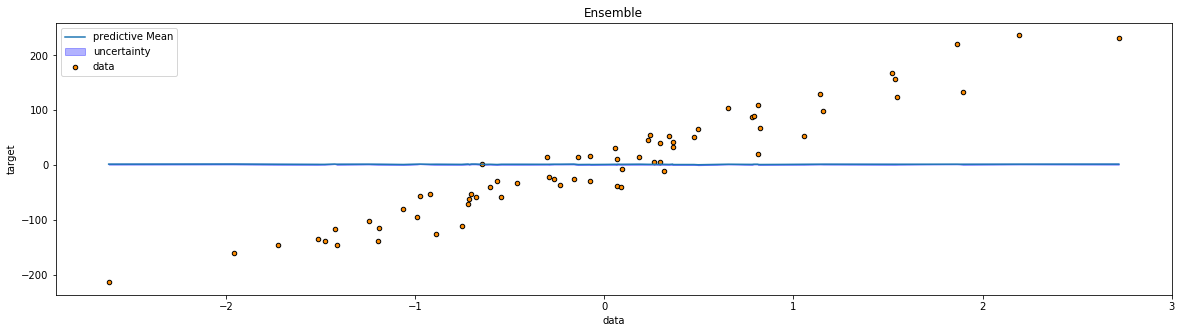

In [11]:
dropout_network = networks.DropoutNetwork()
dropout_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(66,)
(66, 1)


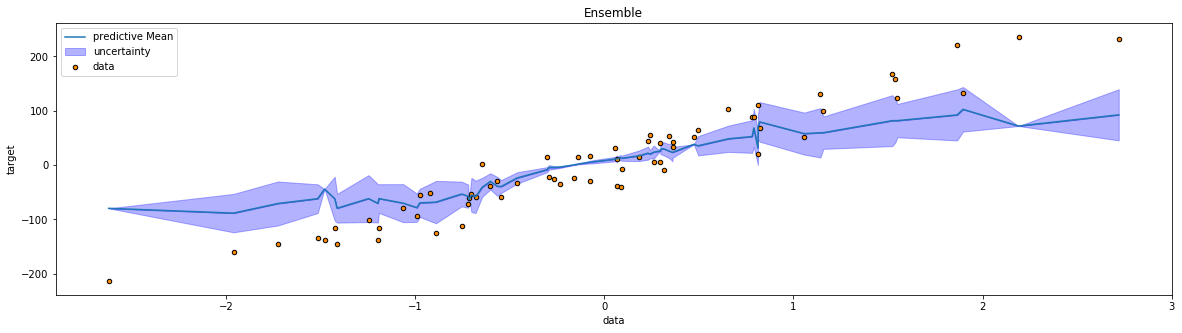

In [12]:
dropout_network.fit(X_train,y_train)
dropout_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


# GaussianLoss Networks

(66,)
(66, 1)


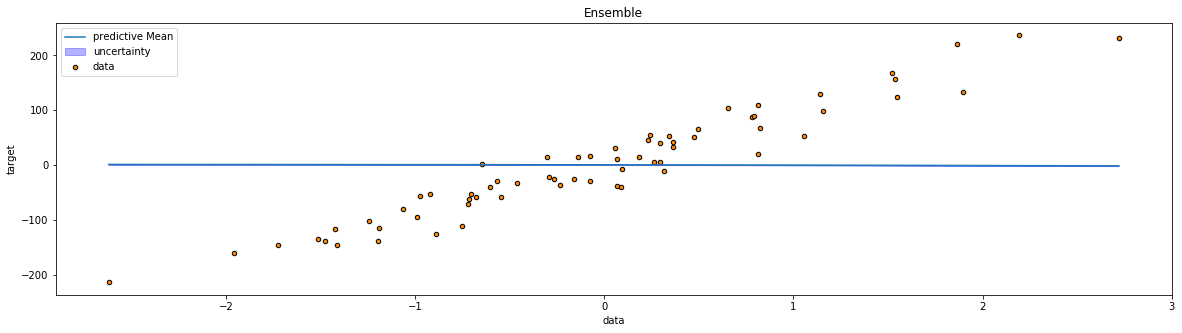

In [13]:
gl_network = networks.GaussianLossNetwork(**params)
gl_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(66,)
(66, 1)


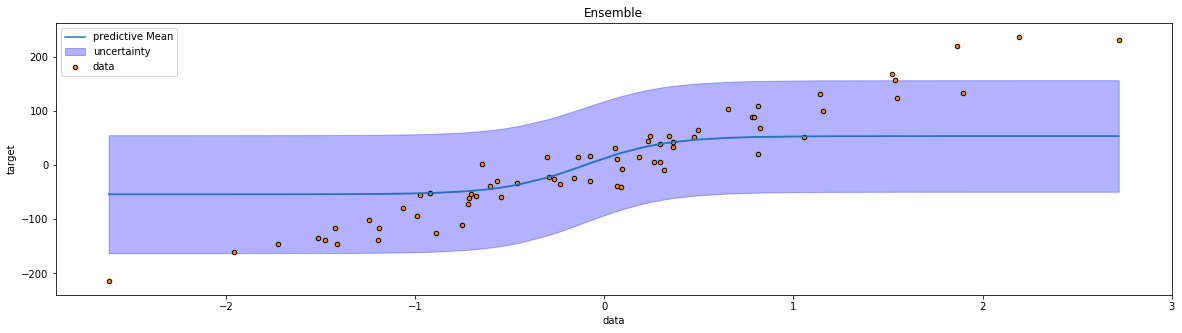

In [14]:
gl_network.fit(X_train,y_train)

gl_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))



In [15]:
#gl_network.self_evaluate(X_test,y_test)


# LR NEtwork

(66,)
(66, 1)


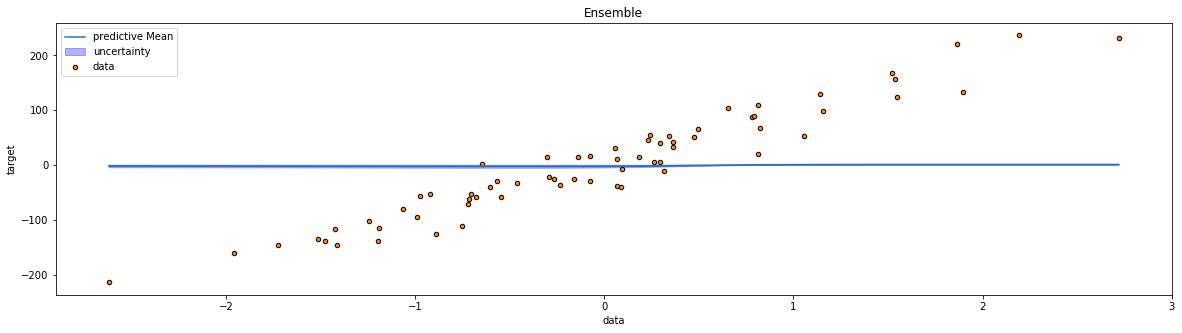

In [16]:
gl_lr_network = networks.GaussianLearningRateNetwork(**params)
gl_lr_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


(66,)
(66, 1)


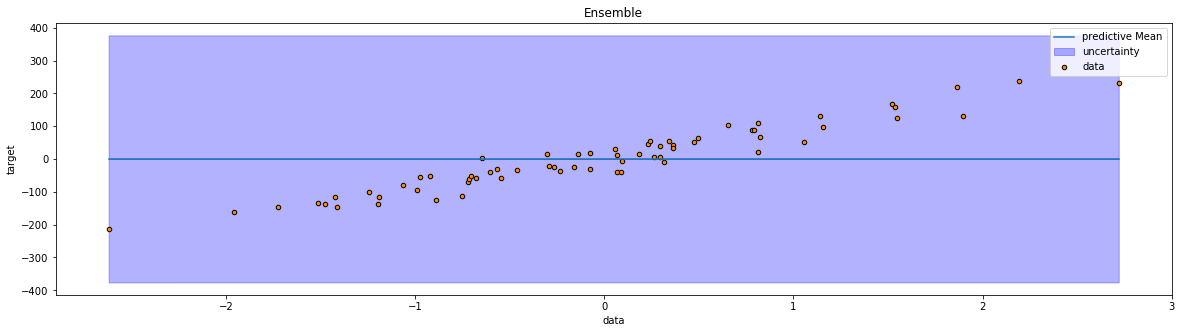

In [17]:
gl_lr_network.fit(X_train,y_train)

gl_lr_network.network_mutli_dimensional_scatterplot(X_test,y_test,figsize=(20,5))


In [18]:
gl_network.self_evaluate(X_test,y_test)


{'NLPD': -56.34041673352414,
 'correlation between error and variance': -0.11518363375243047,
 'coverage probability': 0.9090909090909091,
 'rsme': 106.87093875413125}

In [19]:

import helpers

importlib.reload(helpers) #this is for notebooks - otherwise I have to restart the kernel every time I change anything


<module 'helpers' from '/Users/thomas/Documents/Master-Thesis/new_structure/helpers.py'>

In [20]:
helpers.show_graph(gl_network.g)